# MNIST Digit Classification using Support Vector Machines (SVM)

This notebook demonstrates the use of Support Vector Machines with different kernels to classify handwritten digits from the MNIST dataset.

## Objectives:
- Apply SVM with linear and RBF kernels to image classification.
- Compare model performance across kernels.
- Evaluate classification results using precision, recall, F1-score, and accuracy.

In [ ]:
# Importing the libraries and loading the dataset:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Pre-processing

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten 28x28 images into 784-length vectors
train_2d = x_train.reshape((x_train.shape[0], -1))
test_2d = x_test.reshape((x_test.shape[0], -1))

## Linear SVM

In [ ]:
# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(train_2d, y_train)

# Training evaluation
y_train_pred_linear = svm_linear.predict(train_2d)
print("Linear SVM - Training Accuracy:", accuracy_score(y_train, y_train_pred_linear))
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred_linear))

# Test evaluation
y_test_pred_linear = svm_linear.predict(test_2d)
print("Linear SVM - Test Accuracy:", accuracy_score(y_test, y_test_pred_linear))
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_linear))

Linear SVM - Training Accuracy: 0.97075
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       0.98      0.99      0.99      6742
           2       0.96      0.97      0.97      5958
           3       0.96      0.96      0.96      6131
           4       0.97      0.98      0.97      5842
           5       0.96      0.95      0.95      5421
           6       0.99      0.99      0.99      5918
           7       0.97      0.97      0.97      6265
           8       0.97      0.95      0.96      5851
           9       0.96      0.95      0.95      5949

    accuracy                           0.97     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.97      0.97      0.97     60000

Linear SVM - Test Accuracy: 0.9404
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       

## RBF SVM

In [ ]:
# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, random_state=42)
svm_rbf.fit(train_2d, y_train)

# Training evaluation
y_train_pred_rbf = svm_rbf.predict(train_2d)
print("RBF SVM - Training Accuracy:", accuracy_score(y_train, y_train_pred_rbf))
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred_rbf))

# Test evaluation
y_test_pred_rbf = svm_rbf.predict(test_2d)
print("RBF SVM - Test Accuracy:", accuracy_score(y_test, y_test_pred_rbf))
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred_rbf))


RBF SVM - Training Accuracy: 0.9899166666666667
Classification Report (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.99      0.98      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       0.99      1.00      1.00      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.98      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000

RBF SVM - Test Accuracy: 0.9792
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99  

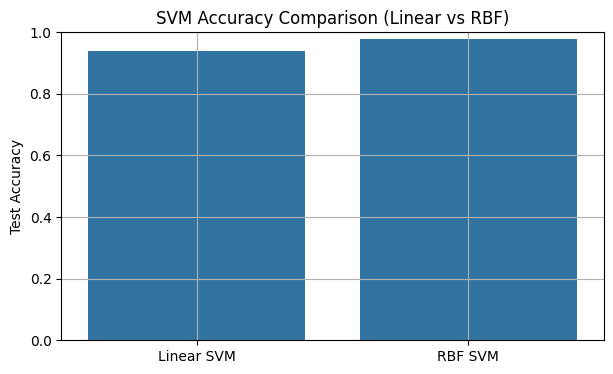

In [ ]:
# Accuracy Comparison

models = ['Linear SVM', 'RBF SVM']
accuracies = [
    accuracy_score(y_test, y_test_pred_linear),
    accuracy_score(y_test, y_test_pred_rbf)
]

plt.figure(figsize=(7, 4))
sns.barplot(x=models, y=accuracies)
plt.title('SVM Accuracy Comparison (Linear vs RBF)')
plt.ylabel('Test Accuracy')
plt.ylim(0, 1.0)
plt.grid(True)
plt.show()


Best SVM Model: RBF SVM


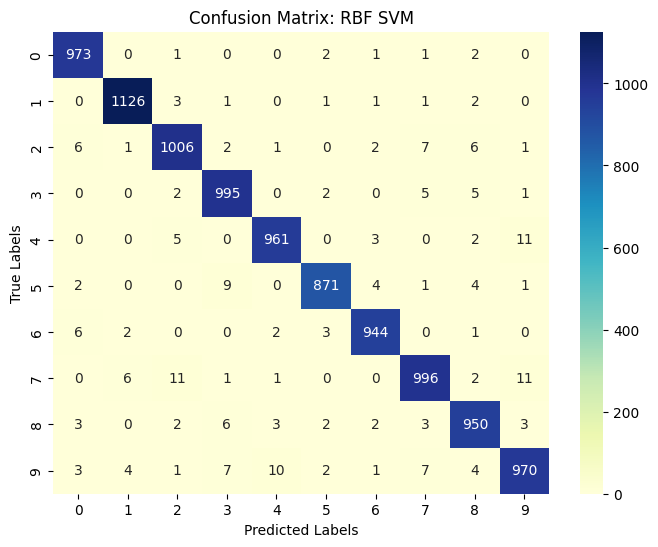

In [ ]:
# Identify best model
best_index = np.argmax(accuracies)
best_model_name = models[best_index]
best_preds = [y_test_pred_linear, y_test_pred_rbf][best_index]

print(f"\nBest SVM Model: {best_model_name}")

# Confusion matrix
cm = confusion_matrix(y_test, best_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()